# NLP

# 1- Librairies et Packages

In [1]:
! pip install nltk

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import re
import string
from nltk.tokenize import word_tokenize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.simplefilter(action='ignore')
import nltk
from nltk.stem import WordNetLemmatizer

# 2- Chargement de mon fichier csv

In [3]:
df = pd.read_csv("anthems.csv", encoding='utf-8')
df

,Country,Alpha-2,Alpha-3,Continent,Anthem
0,Albania,AL,ALB,Europe,"Around our flag we stand united, With one wish..."
1,Armenia,AM,ARM,Europe,"Our Fatherland, free, independent, That has fo..."
2,Austria,AT,AUT,Europe,"Land of mountains, land by the river, Land of ..."
3,Azerbaijan,AZ,AZE,Europe,"Azerbaijan, Azerbaijan! The glorious Fatherlan..."
4,Belarus,BY,BLR,Europe,"We, Belarusians, are peaceful people, Wholehea..."
...,...,...,...,...,...
185,Tunisia,TN,TUN,Africa,O defenders of the Homeland! Rally around to t...
186,Uganda,UG,UGA,Africa,"Oh Uganda! May God uphold Thee, We lay our fut..."
187,Western Sahara,EH,ESH,Africa,"O sons of the Sahara! In the battlefield, you ..."
188,Zambia,ZM,ZMB,Africa,"Stand and sing of Zambia, proud and free, Land..."


In [4]:
### Récupération de mon df
df = df[['Continent', 'Anthem']]

In [5]:
df

,Continent,Anthem
0,Europe,"Around our flag we stand united, With one wish..."
1,Europe,"Our Fatherland, free, independent, That has fo..."
2,Europe,"Land of mountains, land by the river, Land of ..."
3,Europe,"Azerbaijan, Azerbaijan! The glorious Fatherlan..."
4,Europe,"We, Belarusians, are peaceful people, Wholehea..."
...,...,...
185,Africa,O defenders of the Homeland! Rally around to t...
186,Africa,"Oh Uganda! May God uphold Thee, We lay our fut..."
187,Africa,"O sons of the Sahara! In the battlefield, you ..."
188,Africa,"Stand and sing of Zambia, proud and free, Land..."


# 3- Nettoyage des caractères spéciaux/ Stemming/ Lemmatization

In [6]:
### Fonction globale de nettoyage
def text_processing(texte):
    import re
    #sentence += " "
    cleaned=clean_text(texte)
    resultat = nett_caractere_spe(cleaned)
    resultat = remp_emoticon(resultat)
    resultat = remp_abreviation(resultat)
    resultat = supp_lettre_seule(resultat)
    resultat = re.sub('\n+', ' ', resultat.lower())
    resultat = re.sub(r'\d+', '', resultat)
    tokens = tokenize(resultat)
    #tokens = normalyse(cleaned)
    tokens = remove_stopwords(tokens)
    tokens = remove_Punctuation(tokens)
    tokens = lemmatize(tokens)
    return tokens
    
def clean_text(text):
    import re  #permet de traiter des donnees textuelles
    #https://docs.python.org/fr/3/library/re.html

    # lowers
    text = text.lower()
    # removes special chars
    text = re.sub(r'\W|_', ' ', text)
    # removes digits
    text = re.sub(r'[0-9]', '', text)
    # removes multiple spaces
    text = re.sub(r'\s+', ' ', text)
    # removes space at the start or end of the string
    text = re.sub(r'^\s|\s$', '', text)

    # remove all single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)

    # Remove single characters from the start
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)

    # Removing prefixed 'b'
    text = re.sub(r'^b\s+', ' ', text)
    
     # supprimer les liens
    text = re.sub(r'https?:\S+|http?:\S', ' link ', text)
    
    # Remplacer les mentions @XXX par ' user '
    text = re.sub(r"^@\S+|\s@\S+", ' user ', text)
    
    # Remplacer les #XXX par ' hashtags
    text = re.sub(r"^#\S+|\s#\S+", ' hashtag ', text)
    return text

def remp_emoticon(texte):  # Remplacer les emoticones par leur signification
    import re
    # mettre \ devant : ) ^
    # pas de \ devant : ; : - ] >
    resultat = re.sub(
        ';p|;P|:p|:P|xp|xP|=p|=P|:‑P|X‑P|x‑p|:‑p|:‑Þ|:‑þ|:‑b|>:P|d:|:b|:þ|:Þ',
        ' emoticon_langue ', texte)
    resultat = re.sub(':"D', 'emoticon_joyeux', resultat)
    resultat = re.sub(
        ":‑\)|:\)|:-]|:]|:->|:>|8-\)|8\)|:-}|:}|:o\)|:c\)|:\^\)|=]|=\)|:-\)\)|:'‑\)|:'\)",
        ' emoticon_joyeux ', resultat)
    resultat = re.sub(':‑D|:D|8‑D|8D|=D|=3|B\^D|c:|C:|x‑D|xD|X‑D|XD',
                      ' emoticon_rire ', resultat)
    resultat = re.sub(
        ":‑\(|:\(|:‑c|:c|:‑<|:<|:‑\[|:\[|>:\[|:{|:@|:\(|;\(|:'‑\(|:'\(|:=\(|v.v",
        ' emoticon_triste ', resultat)
    resultat = re.sub("D‑':|D:<|D:|D8|D;|D=|DX", ' emoticon_degout ', resultat)
    resultat = re.sub(
        ":‑O|:O|:‑o|:o|:-0|8‑0|>:O|=O|=o|=0|O_O|o_o|O-O|o‑o|O_o|o_O",
        ' emoticon_surprise ', resultat)
    resultat = re.sub(":-3|:3|=3|x3|X3|>:3", ' emoticon_chat ', resultat)
    resultat = re.sub(":-\|:\|:×|<3", ' emoticon_amour ', resultat)
    resultat = re.sub(";‑\)|;\)|\-\)|\\)|;‑]|;]|;\^\)|;>|:‑,|;D|;3|:‑J",
                      ' emoticon_clindoeil ', resultat)
    resultat = re.sub(":-/ |>.<|>_<|:/|:‑.|>:\|>:/|:\|=/|=\|:L|=L|:S",
                      ' emoticon_sceptique ', resultat)
    resultat = re.sub(
        "<<|>>|<.<|>.>|:$|://|://3|:‑X|:X|:‑#|:#|:‑&|:&|%‑\)|%\)",
        ' emoticon_embarrasse ', resultat)
    resultat = re.sub("8-X|8=X|x-3|x=3|X_X|x_x", ' emoticon_mort ', resultat)

    return resultat

def remp_abreviation(phrase):  # Remplacer les abréviations
    import re
    # specific
    phrase = phrase.lower()
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"cannot", "can not", phrase)
    phrase = re.sub(r"didnt", "did not", phrase)
    phrase = re.sub(r"couldnt", "could not", phrase)
    phrase = re.sub(r"doesnt", "does not", phrase)
    phrase = re.sub(r"dont", "do not", phrase)
    phrase = re.sub(r"hasnt", "has not", phrase)
    phrase = re.sub(r"hadnt", "had not", phrase)
    phrase = re.sub(r"havent", "have not", phrase)
    phrase = re.sub(r"ive", "i have", phrase)
    phrase = re.sub(r"im", "i am", phrase)
    phrase = re.sub(r"wasnt", "was not", phrase)
    phrase = re.sub(r"werent", "were not", phrase)
    phrase = re.sub(r"'cause", "because", phrase)
    phrase = re.sub(r"cos", "because", phrase)
    phrase = re.sub(r"f\*\*k", "fuck", phrase)
    phrase = re.sub(r"f\*\*king", "fucking", phrase)
    phrase = re.sub(r"idk", "i do not know", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"n\'", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    phrase = re.sub(r" u ", " you ", phrase)
    phrase = re.sub(r" ur ", " your ", phrase)
    phrase = re.sub(r" n ", " and ", phrase)

    return phrase

def nett_caractere_spe(texte):
    import re
    resultat = re.sub('&gt;', '>', texte)
    resultat = re.sub('&lt;', '<', resultat)
    resultat = re.sub('&quot;', '\"', resultat)
    resultat = re.sub('&amp;', '&', resultat)
    return resultat

def supp_lettre_seule(
        texte
):  # supprime les lettres seules (les abbréviations type "u", "y r")
    resultat = " ".join(
        [v for v in texte.split(" ") if ((len(v) > 1) or (not v.isalpha()))])
    return resultat

"""
Tokenisation : séparation du texte en mots
"""
def tokenize(text):
    """La tokenization, qui désigne le découpage en mots des différents documents qui constituent votre corpus"""
    from nltk.tokenize import word_tokenize

    tokens= word_tokenize(text)
    return tokens

def remove_stopwords(tokens):
    import nltk
    stopwords = nltk.corpus.stopwords.words("english") 
    return [token for token in tokens if token not in stopwords]

def remove_Punctuation(tokens):
    import string
    return [t for t in tokens if t not in string.punctuation]

''''
La radicalisation utilise la racine du mot, tandis que la lemmatisation 
utilise le contexte dans lequel le mot est utilisé. 

Le stemming consiste à réduire un mot dans sa forme « racine ».
Le but du stemming est de regrouper de nombreuses variantes d’un mot comme un seul et même mot.
'''
from nltk.stem.snowball import SnowballStemmer
import nltk

# Text Stemming
def stem(tokens):
    return [nltk.PorterStemmer().stem(token) for token in tokens]

#Text Lemmatization
def lemmatize(tokens):
    return [nltk.WordNetLemmatizer().lemmatize(token) for token in tokens]

# 4- Vectorisation

In [7]:
def text_vectorization(data,col,size): #data=input data, col=colonne text, size=nombre de mots à considerer
    from sklearn.feature_extraction.text import TfidfVectorizer
    tfidf_vect = TfidfVectorizer(analyzer=text_processing,max_features=size)
    X = tfidf_vect.fit_transform(data[col])
    data_text = pd.DataFrame(X.toarray())
    data_text.columns = tfidf_vect.get_feature_names()  #names_out
    data[data_text.columns]=data_text
    data = data.drop(columns=col)
    return data

In [8]:
# all  #vectorization = regarder le nombre de fois ou le mot est sorti dans le paragraphe  et calcule sa freq
def preprocessing(data):
    #data=encodage_target_binary(data,col="Continent'")  #reequilibrage ## col : le nom de la target
    data=text_vectorization(data, "Anthem",size=15) ## Le nom de la colonne (features xi)
    return data

In [9]:
preprocessing(df)

,Continent,country,free,glory,god,homeland,land,let,li,may,nation,one,people,shall,thy,u
0,Europe,0.000000,0.000000,0.274795,0.234910,0.000000,0.199982,0.000000,0.254167,0.000000,0.243287,0.792131,0.000000,0.279377,0.000000,0.000000
1,Europe,0.000000,0.626211,0.000000,0.000000,0.000000,0.000000,0.569186,0.282468,0.000000,0.270376,0.293444,0.000000,0.000000,0.000000,0.211864
2,Europe,0.000000,0.242615,0.000000,0.000000,0.000000,0.861065,0.220521,0.000000,0.000000,0.000000,0.000000,0.208022,0.000000,0.000000,0.328333
3,Europe,0.000000,0.000000,0.000000,0.000000,0.000000,0.070772,0.000000,0.179895,0.178563,0.000000,0.093443,0.000000,0.000000,0.957842,0.067465
4,Europe,0.000000,0.000000,0.601445,0.000000,0.000000,0.218850,0.000000,0.278148,0.276088,0.000000,0.000000,0.660892,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,Africa,0.000000,0.000000,0.757456,0.000000,0.223288,0.137809,0.352933,0.350298,0.000000,0.167651,0.000000,0.166465,0.192522,0.000000,0.131370
186,Africa,0.296017,0.305974,0.000000,0.255120,0.000000,0.651560,0.000000,0.276034,0.273990,0.000000,0.000000,0.000000,0.000000,0.367432,0.207039
187,Africa,0.000000,0.000000,0.000000,0.000000,0.174643,0.107786,0.000000,0.000000,0.000000,0.131127,0.711573,0.650994,0.000000,0.000000,0.102750
188,Africa,0.000000,0.627742,0.000000,0.174470,0.000000,0.222792,0.095096,0.000000,0.000000,0.180691,0.686377,0.089706,0.000000,0.000000,0.070794


In [10]:
df = preprocessing(df)

In [11]:
df

,Continent,country,free,glory,god,homeland,land,let,li,may,nation,one,people,shall,thy,u
0,Europe,0.000000,0.000000,0.274795,0.234910,0.000000,0.199982,0.000000,0.254167,0.000000,0.243287,0.792131,0.000000,0.279377,0.000000,0.000000
1,Europe,0.000000,0.626211,0.000000,0.000000,0.000000,0.000000,0.569186,0.282468,0.000000,0.270376,0.293444,0.000000,0.000000,0.000000,0.211864
2,Europe,0.000000,0.242615,0.000000,0.000000,0.000000,0.861065,0.220521,0.000000,0.000000,0.000000,0.000000,0.208022,0.000000,0.000000,0.328333
3,Europe,0.000000,0.000000,0.000000,0.000000,0.000000,0.070772,0.000000,0.179895,0.178563,0.000000,0.093443,0.000000,0.000000,0.957842,0.067465
4,Europe,0.000000,0.000000,0.601445,0.000000,0.000000,0.218850,0.000000,0.278148,0.276088,0.000000,0.000000,0.660892,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,Africa,0.000000,0.000000,0.757456,0.000000,0.223288,0.137809,0.352933,0.350298,0.000000,0.167651,0.000000,0.166465,0.192522,0.000000,0.131370
186,Africa,0.296017,0.305974,0.000000,0.255120,0.000000,0.651560,0.000000,0.276034,0.273990,0.000000,0.000000,0.000000,0.000000,0.367432,0.207039
187,Africa,0.000000,0.000000,0.000000,0.000000,0.174643,0.107786,0.000000,0.000000,0.000000,0.131127,0.711573,0.650994,0.000000,0.000000,0.102750
188,Africa,0.000000,0.627742,0.000000,0.174470,0.000000,0.222792,0.095096,0.000000,0.000000,0.180691,0.686377,0.089706,0.000000,0.000000,0.070794


In [12]:
## 
# 1) Créer une matrice des variables indépendantes et le vecteur de la variable dépendante.
# X est la matrice et Y est le vecteur
# PS: Astuce : Très souvent la dernière colonne est la colonne dépendante le y à prédire
# La matrice des variables indépendantes est aussi appeelée matrice de featuresµ
X = df.drop('Continent', axis=1)  # Supprimer la colonne "target" de la matrice X
Y = df['Continent']              # Sélectionner uniquement la colonne "target" pour Y
X

,country,free,glory,god,homeland,land,let,li,may,nation,one,people,shall,thy,u
0,0.000000,0.000000,0.274795,0.234910,0.000000,0.199982,0.000000,0.254167,0.000000,0.243287,0.792131,0.000000,0.279377,0.000000,0.000000
1,0.000000,0.626211,0.000000,0.000000,0.000000,0.000000,0.569186,0.282468,0.000000,0.270376,0.293444,0.000000,0.000000,0.000000,0.211864
2,0.000000,0.242615,0.000000,0.000000,0.000000,0.861065,0.220521,0.000000,0.000000,0.000000,0.000000,0.208022,0.000000,0.000000,0.328333
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.070772,0.000000,0.179895,0.178563,0.000000,0.093443,0.000000,0.000000,0.957842,0.067465
4,0.000000,0.000000,0.601445,0.000000,0.000000,0.218850,0.000000,0.278148,0.276088,0.000000,0.000000,0.660892,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,0.000000,0.000000,0.757456,0.000000,0.223288,0.137809,0.352933,0.350298,0.000000,0.167651,0.000000,0.166465,0.192522,0.000000,0.131370
186,0.296017,0.305974,0.000000,0.255120,0.000000,0.651560,0.000000,0.276034,0.273990,0.000000,0.000000,0.000000,0.000000,0.367432,0.207039
187,0.000000,0.000000,0.000000,0.000000,0.174643,0.107786,0.000000,0.000000,0.000000,0.131127,0.711573,0.650994,0.000000,0.000000,0.102750
188,0.000000,0.627742,0.000000,0.174470,0.000000,0.222792,0.095096,0.000000,0.000000,0.180691,0.686377,0.089706,0.000000,0.000000,0.070794


In [13]:
Y

0      Europe
1      Europe
2      Europe
3      Europe
4      Europe
        ...  
185    Africa
186    Africa
187    Africa
188    Africa
189    Africa
Name: Continent, Length: 190, dtype: object

In [14]:
np.unique(Y)

array(['Africa', 'Asia', 'Europe', 'North_America', 'Oceania',
       'South_America'], dtype=object)

# Standardisation des données 

In [15]:
from sklearn.preprocessing import StandardScaler

# Créer un objet StandardScaler
scaler = StandardScaler()
# Standardiser les données
X = scaler.fit_transform(X)

In [16]:
### Séparation du dataset en training_set et en test_set

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state= 0)

In [17]:
print(X_train)
print(X_test)
print(Y_train)
print(Y_test)

[[ 1.2107825  -0.52645816 -0.52057284 ... -0.51390451 -0.4107875
   1.07368182]
 [ 0.41980377 -0.52645816 -0.52057284 ...  0.38143264 -0.4107875
  -0.83392913]
 [ 0.40387738 -0.52645816  0.36513242 ...  2.1260634  -0.4107875
  -0.32756604]
 ...
 [ 0.87212855 -0.52645816  2.15918239 ... -0.51390451 -0.4107875
  -0.83392913]
 [-0.5092837   2.12126424 -0.52057284 ... -0.51390451 -0.4107875
   0.03122844]
 [ 1.48603294  0.60225205 -0.52057284 ... -0.51390451 -0.4107875
   2.48538022]]
[[ 3.22501522e+00 -5.26458161e-01  1.74319000e+00 -2.65014408e-01
  -4.21443070e-01 -4.99440708e-01 -5.92660164e-01 -5.57483587e-01
  -5.88454750e-01 -6.01448390e-01 -5.63287814e-01 -5.99207907e-01
  -5.13904506e-01 -4.10787495e-01  9.77960682e-01]
 [-5.09283696e-01 -5.26458161e-01 -5.20572836e-01 -6.22764299e-01
  -4.21443070e-01  8.66533095e-01 -5.92660164e-01  7.47770699e-01
   2.63103099e+00  6.75756298e-01 -5.63287814e-01  4.36886246e-01
  -5.13904506e-01 -4.10787495e-01 -5.93588306e-02]
 [-5.09283696e-0

# MACHINE LEARNING SUPERVISE

# PARTIE A : MODELE DE CLASSIFICATION

## Modèle 1 : Regression logistique

In [18]:
from sklearn.linear_model import LogisticRegression

# Créer et entraîner le modèle de régression logistique
model1 = LogisticRegression()
model1.fit(X_train, Y_train)


LogisticRegression()

### Faire de nouvelles prédictions

In [19]:
Y_pred1 = model1.predict(X_test)
Y_pred1

array(['Asia', 'Asia', 'Africa', 'Asia', 'Asia', 'Europe', 'Africa',
       'Africa', 'Asia', 'Africa', 'Europe', 'Asia', 'Asia', 'Asia',
       'Europe', 'Asia', 'Europe', 'Africa', 'Asia', 'Asia',
       'South_America', 'North_America', 'Europe', 'Europe', 'Europe',
       'Asia', 'South_America', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia',
       'Europe', 'Asia', 'Asia', 'Oceania', 'Asia', 'Asia', 'Asia',
       'South_America', 'Asia', 'Oceania', 'Europe', 'Africa', 'Asia',
       'Africa', 'Asia', 'Europe', 'Africa', 'Africa', 'Asia', 'Africa',
       'Africa', 'Africa', 'Europe', 'Europe', 'Asia', 'Europe',
       'South_America', 'Europe', 'Asia', 'Europe', 'North_America',
       'Oceania'], dtype=object)

In [20]:
print(Y_test)
print(Y_pred1)

108             Asia
74     North_America
161           Africa
95              Asia
123             Asia
           ...      
86           Oceania
130             Asia
40            Europe
189           Africa
22            Europe
Name: Continent, Length: 64, dtype: object
['Asia' 'Asia' 'Africa' 'Asia' 'Asia' 'Europe' 'Africa' 'Africa' 'Asia'
 'Africa' 'Europe' 'Asia' 'Asia' 'Asia' 'Europe' 'Asia' 'Europe' 'Africa'
 'Asia' 'Asia' 'South_America' 'North_America' 'Europe' 'Europe' 'Europe'
 'Asia' 'South_America' 'Asia' 'Asia' 'Asia' 'Asia' 'Asia' 'Europe' 'Asia'
 'Asia' 'Oceania' 'Asia' 'Asia' 'Asia' 'South_America' 'Asia' 'Oceania'
 'Europe' 'Africa' 'Asia' 'Africa' 'Asia' 'Europe' 'Africa' 'Africa'
 'Asia' 'Africa' 'Africa' 'Africa' 'Europe' 'Europe' 'Asia' 'Europe'
 'South_America' 'Europe' 'Asia' 'Europe' 'North_America' 'Oceania']


## Matrice de confusion :

### La matrice de confusion est une représentation tabulaire utilisée pour évaluer les performances d'un modèle de classification. Elle permet de visualiser la qualité des prédictions du modèle en comparant les valeurs réelles des échantillons avec les prédictions effectuées par le modèle.

In [21]:
from sklearn.metrics import confusion_matrix
CM1 = confusion_matrix(Y_test, Y_pred1)
CM1

array([[ 5, 11,  4,  1,  0,  0],
       [ 2,  9,  2,  1,  0,  0],
       [ 3,  3,  5,  0,  2,  1],
       [ 2,  2,  1,  0,  0,  2],
       [ 0,  0,  2,  0,  1,  0],
       [ 0,  3,  1,  0,  0,  1]], dtype=int64)

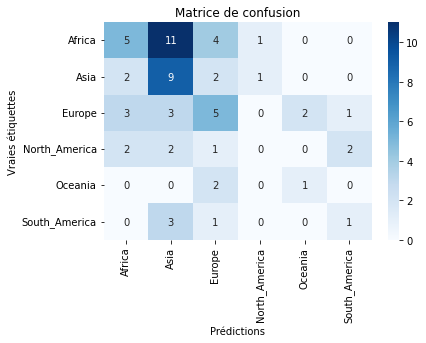

In [22]:
# Étiquettes des classes
classes = ['Africa', 'Asia', 'Europe', 'North_America', 'Oceania', 'South_America']

# Créer une figure et un axe
fig, ax = plt.subplots()

# Afficher la matrice de confusion sous forme de heatmap
sns.heatmap(CM1, annot=True, fmt='d', xticklabels=classes, yticklabels=classes, cmap='Blues', ax=ax)

# Définir les labels des axes
ax.set_xlabel('Prédictions')
ax.set_ylabel('Vraies étiquettes')
ax.set_title('Matrice de confusion')

# Afficher la figure
plt.show()

In [23]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, cohen_kappa_score, matthews_corrcoef

Accuracy_Rate1 = accuracy_score(Y_test, Y_pred1)
Error_rate1 = 1 - Accuracy_Rate1
F1_score1 = f1_score(Y_test, Y_pred1, average='weighted')  # Modifier le paramètre average ici
Precision1 = precision_score(Y_test, Y_pred1, average='weighted')  # Modifier le paramètre average ici
Recall1 = recall_score(Y_test, Y_pred1, average='weighted')  # Modifier le paramètre average ici
CK1 = cohen_kappa_score(Y_test, Y_pred1)
MC1 = matthews_corrcoef(Y_test, Y_pred1)

print("Precision : {:.2f}".format(Precision1))
print("Recall : {:.2f}".format(Recall1))
print("Accuracy Rate: ", Accuracy_Rate1)
print("Error rate: ", Error_rate1)
print("F1_score: ", F1_score1)
print("CK:", CK1)
print("MC:", MC1)

Precision : 0.32
Recall : 0.33
Accuracy Rate:  0.328125
Error rate:  0.671875
F1_score:  0.3015989637756879
CK: 0.13973116598937163
MC: 0.14684162753987792


# Modèle 2 : SVM

In [24]:
from sklearn.svm import SVC

# Créer et entraîner le modèle SVM
model2 = SVC(kernel='rbf', C=1.0, gamma='scale')
model2.fit(X_train, Y_train)

SVC()

In [25]:
# Faire des prédictions sur l'ensemble de test
Y_pred2 = model2.predict(X_test)
Y_pred2

array(['Asia', 'Asia', 'Africa', 'Asia', 'Asia', 'Europe', 'Africa',
       'Africa', 'Asia', 'Africa', 'Europe', 'Africa', 'Europe', 'Asia',
       'Europe', 'Asia', 'Africa', 'Asia', 'Asia', 'Asia',
       'North_America', 'Asia', 'Europe', 'Africa', 'Europe', 'Asia',
       'Africa', 'Africa', 'Asia', 'Asia', 'Asia', 'Asia', 'Africa',
       'Asia', 'Africa', 'Africa', 'Asia', 'Africa', 'Africa', 'Asia',
       'Asia', 'Africa', 'Europe', 'Africa', 'Africa', 'Africa', 'Asia',
       'Europe', 'Africa', 'Africa', 'Asia', 'Africa', 'Europe', 'Africa',
       'Africa', 'Europe', 'Asia', 'Africa', 'Europe', 'Africa', 'Asia',
       'Europe', 'Asia', 'Africa'], dtype=object)

In [26]:
print(Y_test)
print(Y_pred2)

108             Asia
74     North_America
161           Africa
95              Asia
123             Asia
           ...      
86           Oceania
130             Asia
40            Europe
189           Africa
22            Europe
Name: Continent, Length: 64, dtype: object
['Asia' 'Asia' 'Africa' 'Asia' 'Asia' 'Europe' 'Africa' 'Africa' 'Asia'
 'Africa' 'Europe' 'Africa' 'Europe' 'Asia' 'Europe' 'Asia' 'Africa'
 'Asia' 'Asia' 'Asia' 'North_America' 'Asia' 'Europe' 'Africa' 'Europe'
 'Asia' 'Africa' 'Africa' 'Asia' 'Asia' 'Asia' 'Asia' 'Africa' 'Asia'
 'Africa' 'Africa' 'Asia' 'Africa' 'Africa' 'Asia' 'Asia' 'Africa'
 'Europe' 'Africa' 'Africa' 'Africa' 'Asia' 'Europe' 'Africa' 'Africa'
 'Asia' 'Africa' 'Europe' 'Africa' 'Africa' 'Europe' 'Asia' 'Africa'
 'Europe' 'Africa' 'Asia' 'Europe' 'Asia' 'Africa']


In [27]:
from sklearn.metrics import confusion_matrix
CM2 = confusion_matrix(Y_test, Y_pred2)
CM2

array([[9, 8, 4, 0, 0, 0],
       [4, 9, 1, 0, 0, 0],
       [6, 4, 4, 0, 0, 0],
       [3, 2, 1, 1, 0, 0],
       [3, 0, 0, 0, 0, 0],
       [1, 2, 2, 0, 0, 0]], dtype=int64)

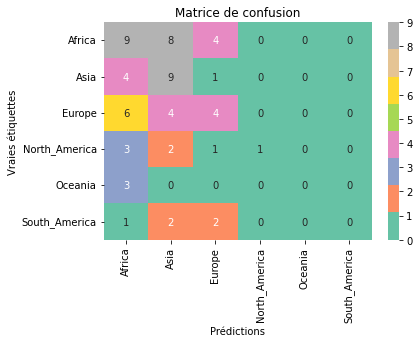

In [28]:
# Étiquettes des classes
classes = ['Africa', 'Asia', 'Europe', 'North_America', 'Oceania', 'South_America']

# Créer une figure et un axe
fig, ax = plt.subplots()

# Afficher la matrice de confusion sous forme de heatmap
sns.heatmap(CM2, annot=True, fmt='d', xticklabels=classes, yticklabels=classes, cmap='Set2', ax=ax)

# Définir les labels des axes
ax.set_xlabel('Prédictions')
ax.set_ylabel('Vraies étiquettes')
ax.set_title('Matrice de confusion')

# Afficher la figure
plt.show()

In [29]:
Accuracy_Rate2 = accuracy_score(Y_test, Y_pred2)
Error_rate2 = 1 - Accuracy_Rate2
F1_score2 = f1_score(Y_test, Y_pred2, average='weighted')  # Modifier le paramètre average ici
Precision2 = precision_score(Y_test, Y_pred2, average='weighted')  # Modifier le paramètre average ici
Recall2 = recall_score(Y_test, Y_pred2, average='weighted')  # Modifier le paramètre average ici
CK2 = cohen_kappa_score(Y_test, Y_pred2)
MC2 = matthews_corrcoef(Y_test, Y_pred2)

print("Precision : {:.2f}".format(Precision2))
print("Recall : {:.2f}".format(Recall2))
print("Accuracy Rate: ", Accuracy_Rate2)
print("Error rate: ", Error_rate2)
print("F1_score: ", F1_score2)
print("CK:", CK2)
print("MC:", MC2)

Precision : 0.37
Recall : 0.36
Accuracy Rate:  0.359375
Error rate:  0.640625
F1_score:  0.32127787438625205
CK: 0.1325619834710744
MC: 0.13813631796199471


# Modèle 3 : Naive Bayes

In [54]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Créer et entraîner le modèle Naive Bayes
model3 = GaussianNB()
model3.fit(X_train, Y_train)

GaussianNB()

In [31]:
# Faire des prédictions sur l'ensemble de test
Y_pred3 = model3.predict(X_test)
Y_pred3

array(['Asia', 'Asia', 'South_America', 'Europe', 'Asia', 'South_America',
       'Africa', 'Oceania', 'Asia', 'Oceania', 'Europe', 'Africa',
       'Europe', 'Asia', 'Europe', 'Asia', 'Oceania', 'Asia', 'Asia',
       'Asia', 'North_America', 'Oceania', 'Europe', 'Oceania', 'Oceania',
       'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'North_America',
       'North_America', 'Europe', 'Asia', 'Africa', 'Oceania', 'Europe',
       'Asia', 'Asia', 'South_America', 'Africa', 'Oceania', 'Oceania',
       'Africa', 'Oceania', 'Oceania', 'South_America', 'Oceania',
       'Oceania', 'Africa', 'Oceania', 'Oceania', 'Oceania', 'Oceania',
       'Europe', 'Europe', 'Oceania', 'Oceania', 'South_America',
       'Oceania', 'Asia', 'Europe', 'South_America', 'Oceania'],
      dtype='<U13')

In [32]:
from sklearn.metrics import confusion_matrix
CM3 = confusion_matrix(Y_test, Y_pred3)
CM3

array([[2, 5, 4, 0, 8, 2],
       [1, 7, 2, 0, 4, 0],
       [1, 1, 2, 1, 7, 2],
       [1, 4, 0, 1, 0, 1],
       [0, 0, 1, 0, 2, 0],
       [1, 1, 1, 1, 0, 1]], dtype=int64)

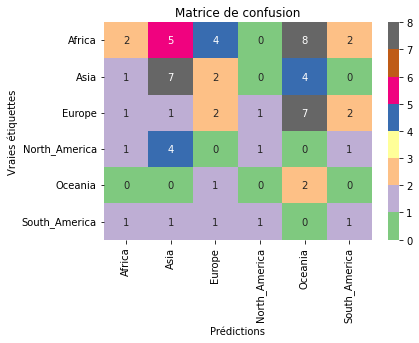

In [33]:
# Étiquettes des classes
classes = ['Africa', 'Asia', 'Europe', 'North_America', 'Oceania', 'South_America']

# Créer une figure et un axe
fig, ax = plt.subplots()

# Afficher la matrice de confusion sous forme de heatmap
sns.heatmap(CM3, annot=True, fmt='d', xticklabels=classes, yticklabels=classes, cmap='Accent', ax=ax)

# Définir les labels des axes
ax.set_xlabel('Prédictions')
ax.set_ylabel('Vraies étiquettes')
ax.set_title('Matrice de confusion')

# Afficher la figure
plt.show()

In [34]:
Accuracy_Rate3 = accuracy_score(Y_test, Y_pred3)
Error_rate3 = 1 - Accuracy_Rate3
F1_score3 = f1_score(Y_test, Y_pred3, average='weighted')  # Modifier le paramètre average ici
Precision3 = precision_score(Y_test, Y_pred3, average='weighted')  # Modifier le paramètre average ici
Recall3 = recall_score(Y_test, Y_pred3, average='weighted')  # Modifier le paramètre average ici
CK3 = cohen_kappa_score(Y_test, Y_pred3)
MC3 = matthews_corrcoef(Y_test, Y_pred3)

print("Precision : {:.2f}".format(Precision3))
print("Recall : {:.2f}".format(Recall3))
print("Accuracy Rate: ", Accuracy_Rate3)
print("Error rate: ", Error_rate3)
print("F1_score: ", F1_score3)
print("CK:", CK3)
print("MC:", MC3)

Precision : 0.29
Recall : 0.23
Accuracy Rate:  0.234375
Error rate:  0.765625
F1_score:  0.22466461489898987
CK: 0.09468822170900693
MC: 0.10363465520283108


# Modèle 4 : Arbre de décision 

In [35]:
from sklearn.tree import DecisionTreeClassifier

# Créer et entraîner le modèle d'arbre de décision
model4 = DecisionTreeClassifier()
model4.fit(X_train, Y_train)

DecisionTreeClassifier()

In [36]:
# Faire des prédictions sur l'ensemble de test
Y_pred4 = model4.predict(X_test)
Y_pred4

array(['Asia', 'Asia', 'Europe', 'North_America', 'Africa', 'Europe',
       'South_America', 'Africa', 'Africa', 'Europe', 'Europe', 'Africa',
       'Asia', 'Asia', 'North_America', 'Asia', 'Oceania', 'Asia',
       'Africa', 'Africa', 'Africa', 'Asia', 'Africa', 'Europe', 'Africa',
       'Europe', 'Africa', 'Asia', 'Africa', 'Asia', 'South_America',
       'North_America', 'North_America', 'North_America', 'South_America',
       'South_America', 'Asia', 'Africa', 'Asia', 'South_America',
       'Africa', 'Asia', 'South_America', 'Africa', 'Asia', 'Asia',
       'Asia', 'Europe', 'Africa', 'Africa', 'Africa', 'North_America',
       'Asia', 'Africa', 'Europe', 'Africa', 'Africa', 'Africa', 'Africa',
       'Europe', 'South_America', 'Africa', 'South_America', 'Europe'],
      dtype=object)

In [37]:
CM4 = confusion_matrix(Y_test, Y_pred4)
CM4

array([[11,  4,  3,  2,  0,  1],
       [ 5,  5,  0,  2,  0,  2],
       [ 2,  3,  4,  0,  1,  4],
       [ 3,  3,  1,  0,  0,  0],
       [ 0,  1,  2,  0,  0,  0],
       [ 2,  0,  0,  2,  0,  1]], dtype=int64)

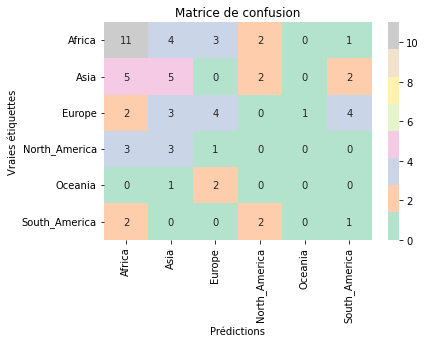

In [38]:
# Étiquettes des classes
classes = ['Africa', 'Asia', 'Europe', 'North_America', 'Oceania', 'South_America']

# Créer une figure et un axe
fig, ax = plt.subplots()

# Afficher la matrice de confusion sous forme de heatmap
sns.heatmap(CM4, annot=True, fmt='d', xticklabels=classes, yticklabels=classes, cmap='Pastel2', ax=ax)

# Définir les labels des axes
ax.set_xlabel('Prédictions')
ax.set_ylabel('Vraies étiquettes')
ax.set_title('Matrice de confusion')

# Afficher la figure
plt.show()

In [39]:
Accuracy_Rate4 = accuracy_score(Y_test, Y_pred4)
Error_rate4 = 1 - Accuracy_Rate4
F1_score4 = f1_score(Y_test, Y_pred4, average='weighted')  # Modifier le paramètre average ici
Precision4 = precision_score(Y_test, Y_pred4, average='weighted')  # Modifier le paramètre average ici
Recall4 = recall_score(Y_test, Y_pred4, average='weighted')  # Modifier le paramètre average ici
CK4 = cohen_kappa_score(Y_test, Y_pred4)
MC4 = matthews_corrcoef(Y_test, Y_pred4)

print("Precision : {:.2f}".format(Precision4))
print("Recall : {:.2f}".format(Recall4))
print("Accuracy Rate: ", Accuracy_Rate4)
print("Error rate: ", Error_rate4)
print("F1_score: ", F1_score4)
print("CK:", CK4)
print("MC:", MC4)

Precision : 0.32
Recall : 0.33
Accuracy Rate:  0.328125
Error rate:  0.671875
F1_score:  0.3219150641025641
CK: 0.1302149178255373
MC: 0.1310097028293496


# Modèle 5 : Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

# Créer et entraîner le modèle Random Forest
model5 = RandomForestClassifier(n_estimators=100)
model5.fit(X_train, Y_train)

RandomForestClassifier()

In [41]:
# Faire des prédictions sur l'ensemble de test
Y_pred5 = model5.predict(X_test)
Y_pred5

array(['Asia', 'Asia', 'Europe', 'Asia', 'Asia', 'Europe', 'Asia',
       'Africa', 'Africa', 'Africa', 'Europe', 'Asia', 'Asia', 'Asia',
       'North_America', 'Europe', 'Oceania', 'Asia', 'Asia', 'Asia',
       'North_America', 'Asia', 'Europe', 'Europe', 'Europe', 'Europe',
       'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Africa', 'Asia',
       'Africa', 'Europe', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia',
       'Africa', 'Europe', 'Africa', 'Asia', 'Asia', 'Asia', 'Europe',
       'Africa', 'Africa', 'Asia', 'Africa', 'Europe', 'Africa', 'Europe',
       'Asia', 'Asia', 'Africa', 'Asia', 'Europe', 'Asia', 'Europe',
       'Africa', 'Europe'], dtype=object)

In [42]:
CM5 = confusion_matrix(Y_test, Y_pred5)
CM5

array([[ 6,  9,  5,  1,  0,  0],
       [ 2, 10,  2,  0,  0,  0],
       [ 2,  5,  6,  0,  1,  0],
       [ 1,  4,  1,  1,  0,  0],
       [ 1,  0,  2,  0,  0,  0],
       [ 1,  4,  0,  0,  0,  0]], dtype=int64)

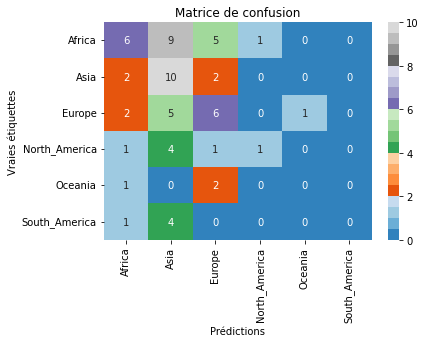

In [43]:
# Étiquettes des classes
classes = ['Africa', 'Asia', 'Europe', 'North_America', 'Oceania', 'South_America']

# Créer une figure et un axe
fig, ax = plt.subplots()

# Afficher la matrice de confusion sous forme de heatmap
sns.heatmap(CM5, annot=True, fmt='d', xticklabels=classes, yticklabels=classes, cmap='tab20c', ax=ax)

# Définir les labels des axes
ax.set_xlabel('Prédictions')
ax.set_ylabel('Vraies étiquettes')
ax.set_title('Matrice de confusion')

# Afficher la figure
plt.show()

In [44]:
Accuracy_Rate5 = accuracy_score(Y_test, Y_pred5)
Error_rate5 = 1 - Accuracy_Rate5
F1_score5 = f1_score(Y_test, Y_pred5, average='weighted')  # Modifier le paramètre average ici
Precision5 = precision_score(Y_test, Y_pred5, average='weighted')  # Modifier le paramètre average ici
Recall5 = recall_score(Y_test, Y_pred5, average='weighted')  # Modifier le paramètre average ici
CK5 = cohen_kappa_score(Y_test, Y_pred5)
MC5 = matthews_corrcoef(Y_test, Y_pred5)

print("Precision : {:.2f}".format(Precision5))
print("Recall : {:.2f}".format(Recall5))
print("Accuracy Rate: ", Accuracy_Rate5)
print("Error rate: ", Error_rate5)
print("F1_score: ", F1_score5)
print("CK:", CK5)
print("MC:", MC5)

Precision : 0.36
Recall : 0.36
Accuracy Rate:  0.359375
Error rate:  0.640625
F1_score:  0.32272307473714124
CK: 0.1627313337587747
MC: 0.17595038014120695


# Modèle 6 : Gradient Boosting

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

# Créer et entraîner le modèle Gradient Boosting
model6 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model6.fit(X_train, Y_train)

GradientBoostingClassifier(random_state=42)

In [46]:
# Faire des prédictions sur l'ensemble de test
Y_pred6 = model6.predict(X_test)
Y_pred6

array(['Asia', 'Asia', 'Africa', 'North_America', 'Africa', 'Europe',
       'Asia', 'Africa', 'Africa', 'Africa', 'Europe', 'Africa', 'Asia',
       'Asia', 'North_America', 'Europe', 'Oceania', 'Asia', 'Asia',
       'Africa', 'Europe', 'North_America', 'Europe', 'Europe', 'Oceania',
       'Europe', 'Asia', 'Asia', 'Africa', 'Asia', 'North_America',
       'North_America', 'Europe', 'Africa', 'Asia', 'Africa', 'Asia',
       'Africa', 'Asia', 'Asia', 'Africa', 'Africa', 'Europe', 'Africa',
       'Asia', 'Asia', 'Asia', 'Europe', 'Africa', 'Africa', 'Oceania',
       'Africa', 'Asia', 'Africa', 'Europe', 'Asia', 'Oceania',
       'North_America', 'Asia', 'Africa', 'Africa', 'Europe', 'Africa',
       'Europe'], dtype=object)

In [47]:
CM6 = confusion_matrix(Y_test, Y_pred6)
CM6

array([[9, 5, 3, 1, 3, 0],
       [6, 3, 3, 2, 0, 0],
       [2, 5, 4, 2, 1, 0],
       [1, 4, 2, 0, 0, 0],
       [2, 0, 1, 0, 0, 0],
       [1, 3, 0, 1, 0, 0]], dtype=int64)

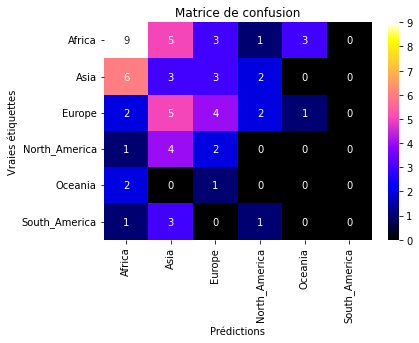

In [48]:
# Étiquettes des classes
classes = ['Africa', 'Asia', 'Europe', 'North_America', 'Oceania', 'South_America']

# Créer une figure et un axe
fig, ax = plt.subplots()

# Afficher la matrice de confusion sous forme de heatmap
sns.heatmap(CM6, annot=True, fmt='d', xticklabels=classes, yticklabels=classes, cmap='gnuplot2', ax=ax)

# Définir les labels des axes
ax.set_xlabel('Prédictions')
ax.set_ylabel('Vraies étiquettes')
ax.set_title('Matrice de confusion')

# Afficher la figure
plt.show()

In [49]:
Accuracy_Rate6 = accuracy_score(Y_test, Y_pred6)
Error_rate6 = 1 - Accuracy_Rate6
F1_score6 = f1_score(Y_test, Y_pred6, average='weighted')  # Modifier le paramètre average ici
Precision6 = precision_score(Y_test, Y_pred6, average='weighted')  # Modifier le paramètre average ici
Recall6 = recall_score(Y_test, Y_pred6, average='weighted')  # Modifier le paramètre average ici
CK6 = cohen_kappa_score(Y_test, Y_pred6)
MC6 = matthews_corrcoef(Y_test, Y_pred6)

print("Precision : {:.2f}".format(Precision6))
print("Recall : {:.2f}".format(Recall6))
print("Accuracy Rate: ", Accuracy_Rate6)
print("Error rate: ", Error_rate6)
print("F1_score: ", F1_score6)
print("CK:", CK6)
print("MC:", MC6)

Precision : 0.24
Recall : 0.25
Accuracy Rate:  0.25
Error rate:  0.75
F1_score:  0.24404275599128541
CK: 0.021344377190188002
MC: 0.02157016436684519


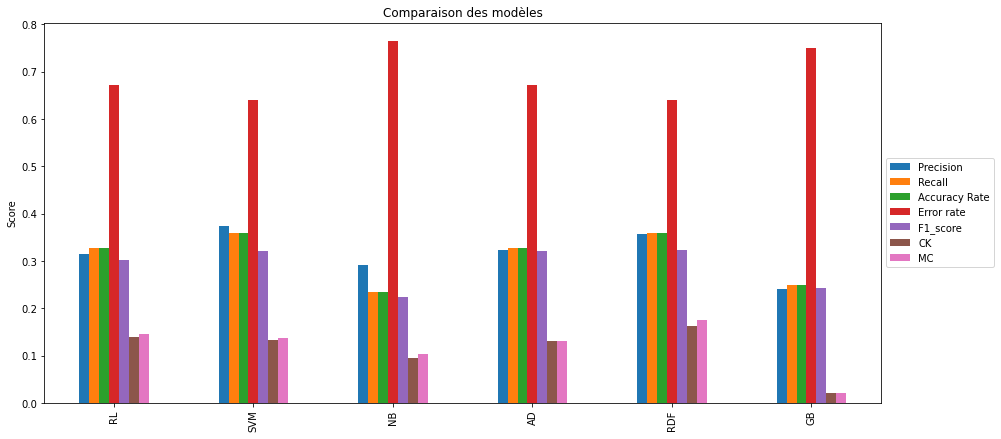

In [60]:
# Données de performance pour chaque modèle

model_data = {
    'RL': {
        'Precision': Precision1,
        'Recall': Recall1,
        'Accuracy Rate': Accuracy_Rate1,
        'Error rate': Error_rate1,
        'F1_score': F1_score1,
        'CK': CK1,
        'MC': MC1,
    },
    'SVM': {
        'Precision': Precision2,
        'Recall': Recall2,
        'Accuracy Rate': Accuracy_Rate2,
        'Error rate': Error_rate2,
        'F1_score': F1_score2,
        'CK': CK2,
        'MC': MC2,
    },
    'NB': {
        'Precision': Precision3,
        'Recall': Recall3,
        'Accuracy Rate': Accuracy_Rate3,
        'Error rate': Error_rate3,
        'F1_score': F1_score3,
        'CK': CK3,
        'MC': MC3,
    },
    'AD': {
        'Precision': Precision4,
        'Recall': Recall4,
        'Accuracy Rate': Accuracy_Rate4,
        'Error rate': Error_rate4,
        'F1_score': F1_score4,
        'CK': CK4,
        'MC': MC4,
    },
    'RDF': {
        'Precision': Precision5,
        'Recall': Recall5,
        'Accuracy Rate': Accuracy_Rate5,
        'Error rate': Error_rate5,
        'F1_score': F1_score5,
        'CK': CK5,
        'MC': MC5,
    },
    'GB': {
        'Precision': Precision6,
        'Recall': Recall6,
        'Accuracy Rate': Accuracy_Rate6,
        'Error rate': Error_rate6,
        'F1_score': F1_score6,
        'CK': CK6,
        'MC': MC6,
    }
}

# Créer un DataFrame pour chaque métrique de performance
precision_df = pd.DataFrame.from_dict({k: v['Precision'] for k, v in model_data.items()}, orient='index')
recall_df = pd.DataFrame.from_dict({k: v['Recall'] for k, v in model_data.items()}, orient='index')
accuracy_df = pd.DataFrame.from_dict({k: v['Accuracy Rate'] for k, v in model_data.items()}, orient='index')
error_df = pd.DataFrame.from_dict({k: v['Error rate'] for k, v in model_data.items()}, orient='index')
f1_score_df = pd.DataFrame.from_dict({k: v['F1_score'] for k, v in model_data.items()}, orient='index')
CK_df = pd.DataFrame.from_dict({k: v['CK'] for k, v in model_data.items()}, orient='index')
MC_df = pd.DataFrame.from_dict({k: v['MC'] for k, v in model_data.items()}, orient='index')

# Placer tous les tableaux dans une liste pour les concaténer horizontalement
dfs = [precision_df, recall_df, accuracy_df, error_df, f1_score_df, CK_df, MC_df]

# Concaténer horizontalement les tableaux pour créer un seul DataFrame
results_df = pd.concat(dfs, axis=1)

# Renommer les colonnes pour qu'elles correspondent aux métriques de performance
results_df.columns = ['Precision', 'Recall', 'Accuracy Rate', 'Error rate', 'F1_score', 'CK', 'MC']

# Tracer les performances de chaque modèle pour chaque métrique
results_df.plot(kind='bar', figsize=(15, 7))
plt.title('Comparaison des modèles')
plt.ylabel('Score')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# DEEP LEARNING